In [1]:
import utils as utils
import ANN as ann
import numpy as np
from scipy.io import loadmat, savemat
import sklearn.metrics as sk

In [2]:
data = loadmat('data/ex3data1.mat', squeeze_me=True)
y = data['y']
X = data['X']

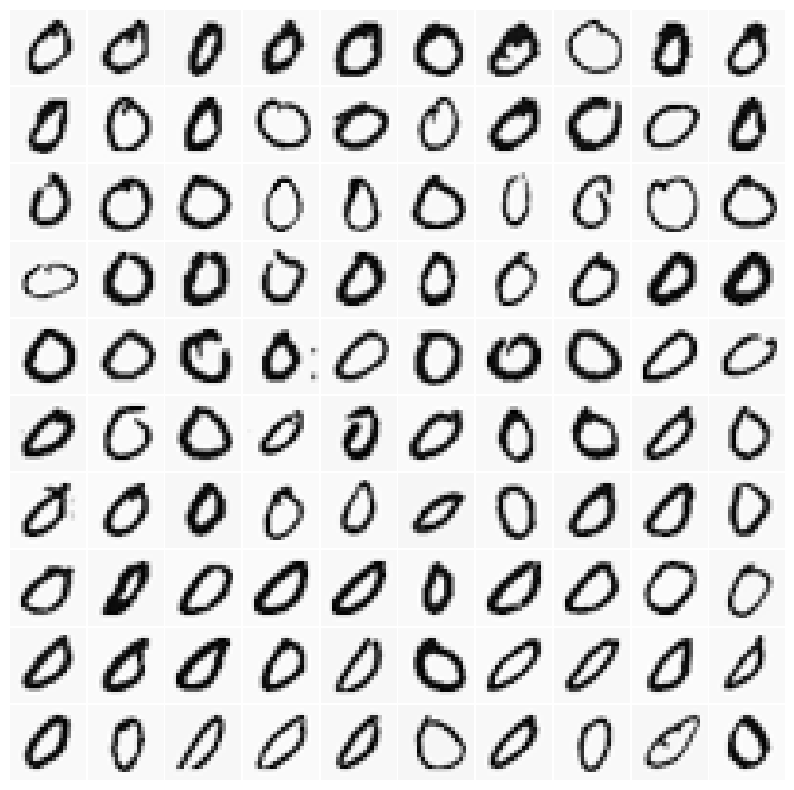

In [4]:
utils.displayData(X[:100])

In [5]:
weights = loadmat('data/ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']

In [6]:
m = X.shape[0]
X1s = np.hstack([np.ones((m, 1)), X])
p=ann.predict(theta1, theta2, X1s)
print("Predicciones:", p[400:1000])

Predicciones: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 

In [7]:
acuracy=0
for i in range(y.size):
    if y[i] ==p[i]:
        acuracy= acuracy+1
acuracy = acuracy/y.size *100 
print (acuracy,"%")

97.52 %


In [22]:
#Confussion matrix
TN=0;
TP=0;
FN=0;
FP=0;

for i in range(y.size):
    if p[i] == 0: #casos positivos
        if y[i]==0:#True positive
            TP += 1
        else:#false positive
            FP += 1
    else: #casois negativos
        if y[i] == 0:
            FN +=1 #false negative
        else:
            TN +=1 #true negative

In [23]:
my_precission= TP/(TP+FP)
my_recall= TP /(TP+FN)
my_F1_score= 2*(precission * recall)/(precission + recall)
print("Mi Matriz de confusión:")
print("[",TP," ",FP,"]")
print("[",FN," ",TN,"]")
print("Mi F1-Score:", my_F1_score)
print("Mi recall:", my_recall)
print("Mi precisión:", my_precission)

Mi Matriz de confusión:
[ 496   9 ]
[ 4   4491 ]
Mi F1-Score: 0.8817777777777778
Mi recall: 0.992
Mi precisión: 0.9821782178217822


In [27]:
#comprobación de los resultados con sklearn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calcula la matriz de confusión
# Vector de etiquetas verdaderas
y_verdadero = y == 0
# Calcula la matriz de confusión
sk.conf_matrix = sk.confusion_matrix(y_verdadero, p == 0)

# Calcula la precisión, recall y F1-Score\n
precision = precision_score(y_verdadero, p == 0)
recall = recall_score(y_verdadero, p == 0)
f1 = f1_score(y_verdadero, p == 0)
    
# Imprime los resultados
print("Matriz de Confusión:")
print(conf_matrix)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Matriz de Confusión:
[[496   0   0   0   1   0   1   0   1   1]
 [  0 491   1   1   2   0   0   1   3   1]
 [  3   1 485   0   3   1   3   1   2   1]
 [  0   2   2 480   0   8   1   4   1   2]
 [  0   2   2   0 484   0   3   0   1   8]
 [  0   0   1   4   1 492   2   0   0   0]
 [  2   2   0   0   0   3 493   0   0   0]
 [  1   3   2   1   4   0   0 485   0   4]
 [  0   4   1   1   2   1   0   0 491   0]
 [  3   2   0   4   2   1   1   5   3 479]]
Precisión: 0.9821782178217822
Recall: 0.992
F1-Score: 0.9870646766169153
